In [1]:
# Cell 1: Import packages and load CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from matplotlib import colors

# Load the data
df = pd.read_csv("/Users/sciencesar/Desktop/coincident_combined.csv")
print(f"Loaded {len(df)} entries.")
df.head()

Welcome to JupyROOT 6.28/00
Loaded 53956 entries.


,Unnamed: 0,Master_ASIC,Master_CH,Master_TYPE,Master_TIMESTAMP_LSB,Master_PULSE_WIDTH_LSB,Master_TOT,Master_RISETIME,Slave_ASIC,Slave_CH,Slave_TYPE,Slave_TIMESTAMP_LSB,Slave_PULSE_WIDTH_LSB,Slave_TOT,Slave_RISETIME,DELAYTIME_LSB
0,0,0,0,3,219562550,165,3304,114,0,3,3,2.195621e+08,81,458,83.0,456.0
1,1,0,0,3,827326636,343,4893,82,0,3,3,8.273262e+08,371,4078,98.0,408.0
2,2,0,0,3,926287926,595,4943,79,0,3,3,9.262875e+08,602,5349,91.0,403.0
3,3,0,0,3,1191607412,235,4167,94,0,3,3,1.191607e+09,500,5039,82.0,421.0
4,4,0,0,3,1570290206,24,384,6894,0,3,3,1.570291e+09,46,348,22310.0,-762.0


In [2]:
# Cell 2: Drop rows with missing data in important columns
df = df.dropna(subset=['DELAYTIME_LSB', 'Master_RISETIME', 'Master_TOT', 'Slave_RISETIME', 'Slave_TOT'])
print(f"Remaining after dropping NAs: {len(df)} events")
df.head()

Remaining after dropping NAs: 53956 events


,Unnamed: 0,Master_ASIC,Master_CH,Master_TYPE,Master_TIMESTAMP_LSB,Master_PULSE_WIDTH_LSB,Master_TOT,Master_RISETIME,Slave_ASIC,Slave_CH,Slave_TYPE,Slave_TIMESTAMP_LSB,Slave_PULSE_WIDTH_LSB,Slave_TOT,Slave_RISETIME,DELAYTIME_LSB
0,0,0,0,3,219562550,165,3304,114,0,3,3,2.195621e+08,81,458,83.0,456.0
1,1,0,0,3,827326636,343,4893,82,0,3,3,8.273262e+08,371,4078,98.0,408.0
2,2,0,0,3,926287926,595,4943,79,0,3,3,9.262875e+08,602,5349,91.0,403.0
3,3,0,0,3,1191607412,235,4167,94,0,3,3,1.191607e+09,500,5039,82.0,421.0
4,4,0,0,3,1570290206,24,384,6894,0,3,3,1.570291e+09,46,348,22310.0,-762.0


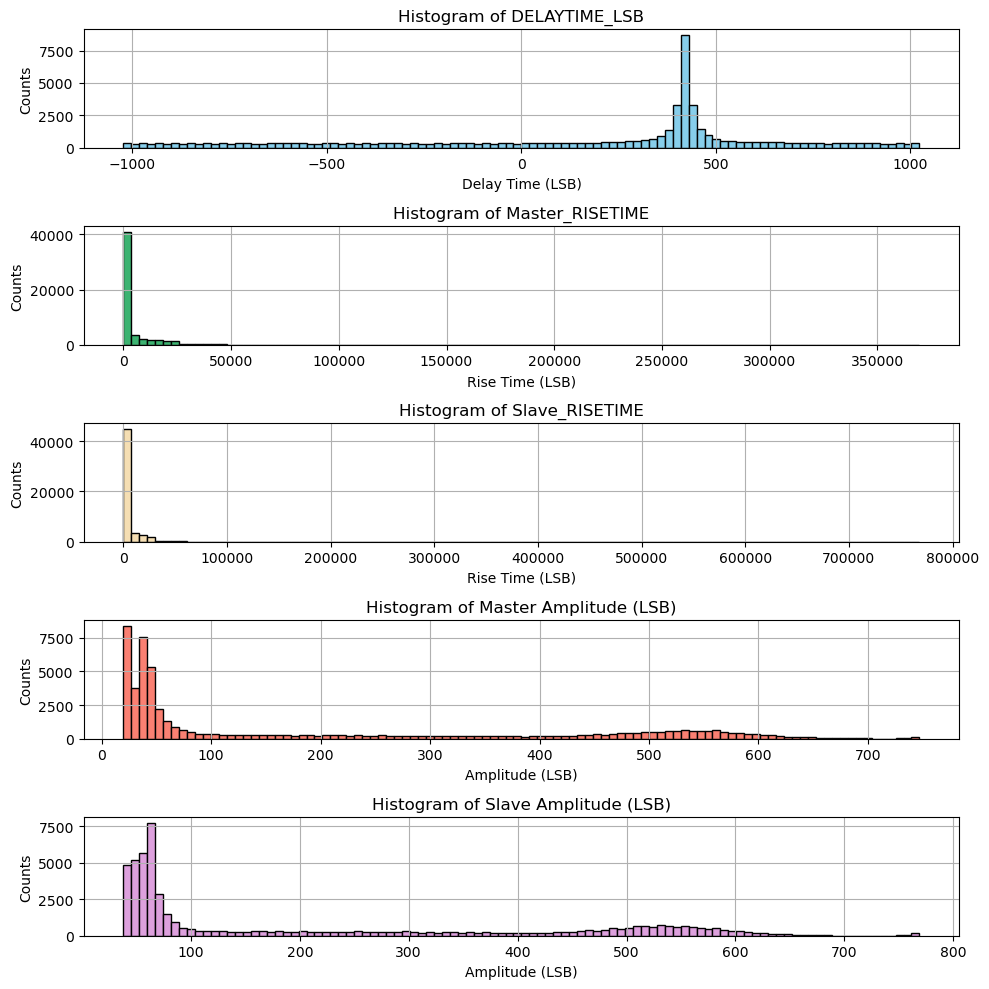

In [3]:
# Cell 3: Plot data

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 10), tight_layout=True)

# Plot Delay Time
axs[0].hist(df['DELAYTIME_LSB'], bins = 100, color='skyblue', edgecolor='black')
axs[0].set_title("Histogram of DELAYTIME_LSB")
axs[0].set_xlabel("Delay Time (LSB)")
axs[0].set_ylabel("Counts")
axs[0].grid(True)

# Plot Master Rise Time
axs[1].hist(df['Master_RISETIME'], bins = 100, color='mediumseagreen', edgecolor='black')
axs[1].set_title("Histogram of Master_RISETIME")
axs[1].set_xlabel("Rise Time (LSB)")
axs[1].set_ylabel("Counts")
axs[1].grid(True)

# Plot Slave Rise Time
axs[2].hist(df['Slave_RISETIME'], bins = 100, color='wheat', edgecolor='black')
axs[2].set_title("Histogram of Slave_RISETIME")
axs[2].set_xlabel("Rise Time (LSB)")
axs[2].set_ylabel("Counts")
axs[2].grid(True)

# Plot Amp Ref
axs[3].hist(df['Master_PULSE_WIDTH_LSB'], bins = 100, color='salmon', edgecolor='black')
axs[3].set_title("Histogram of Master Amplitude (LSB)")
axs[3].set_xlabel("Amplitude (LSB)")
axs[3].set_ylabel("Counts")
axs[3].grid(True)

# Plot Amp Sample
axs[4].hist(df['Slave_PULSE_WIDTH_LSB'], bins = 100, color='plum', edgecolor='black')
axs[4].set_title("Histogram of Slave Amplitude (LSB)")
axs[4].set_xlabel("Amplitude (LSB)")
axs[4].set_ylabel("Counts")
axs[4].grid(True)

plt.show()

In [4]:
# Cell 4: Filter data

df_filtered = df[
    (df['DELAYTIME_LSB'] >= 250) & (df['DELAYTIME_LSB'] <= 500) &
    (df['Master_RISETIME'] >= 0) & (df['Master_RISETIME'] <= 200) &
    (df['Slave_RISETIME'] >= 0) & (df['Slave_RISETIME'] <= 200) &
    (df['Master_PULSE_WIDTH_LSB'] >= 440) & (df['Master_PULSE_WIDTH_LSB'] <= 665) &
    (df['Slave_PULSE_WIDTH_LSB'] >= 440) & (df['Slave_PULSE_WIDTH_LSB'] <= 665)
]

print(f"Entries before cuts: {len(df)}")
print(f"Entries after cuts: {len(df_filtered)}")
df_filtered.head()

Entries before cuts: 53956
Entries after cuts: 4857


,Unnamed: 0,Master_ASIC,Master_CH,Master_TYPE,Master_TIMESTAMP_LSB,Master_PULSE_WIDTH_LSB,Master_TOT,Master_RISETIME,Slave_ASIC,Slave_CH,Slave_TYPE,Slave_TIMESTAMP_LSB,Slave_PULSE_WIDTH_LSB,Slave_TOT,Slave_RISETIME,DELAYTIME_LSB
2,2,0,0,3,926287926,595,4943,79,0,3,3,9.262875e+08,602,5349,91.0,403.0
8,8,0,0,3,2027086435,613,5014,76,0,3,3,2.027086e+09,588,5317,83.0,381.0
12,12,0,0,3,2669193331,474,4816,79,0,3,3,2.669193e+09,597,4733,85.0,413.0
20,20,0,0,3,3983321004,530,5439,76,0,3,3,3.983321e+09,500,4931,82.0,417.0
22,22,0,0,3,4715034492,572,5115,101,0,3,3,4.715034e+09,607,4688,78.0,428.0


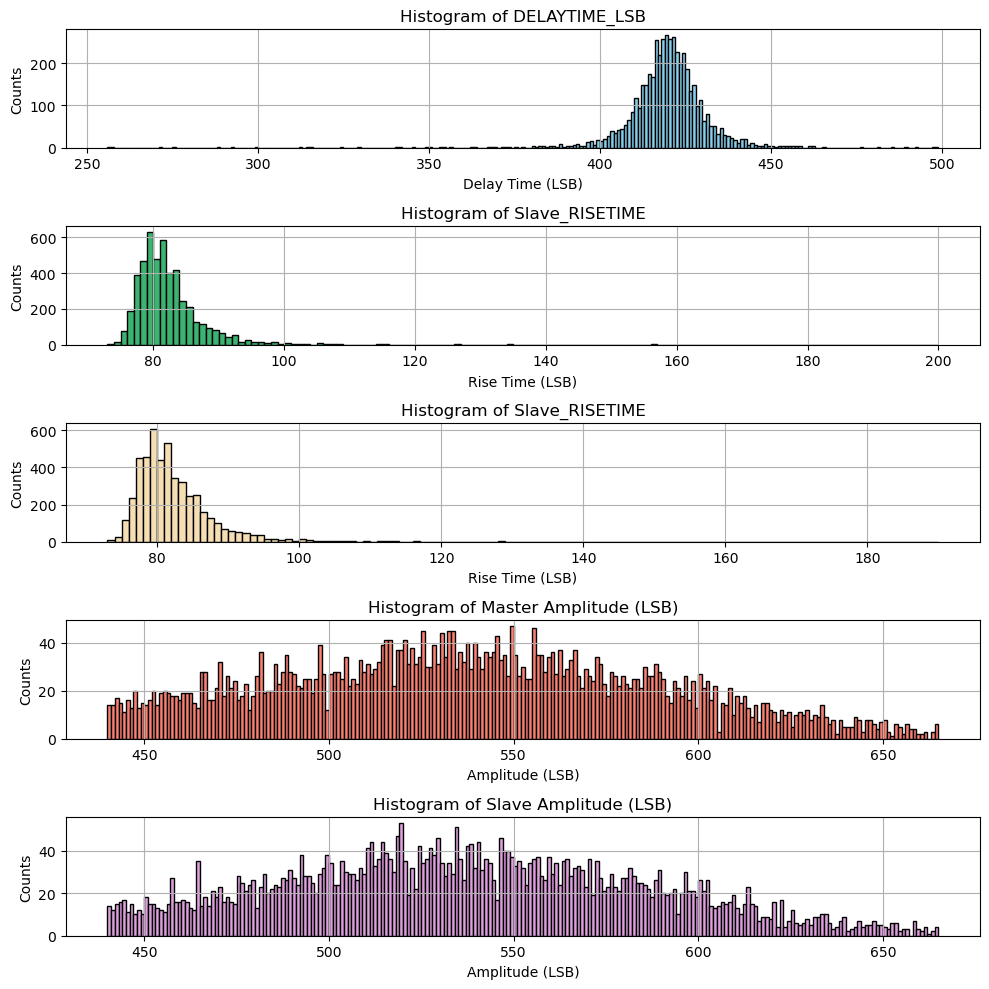

In [5]:
# Cell 5: Plot Filtered Data

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 10), tight_layout=True)

# Plot Delay Time
axs[0].hist(df_filtered['DELAYTIME_LSB'], bins = int(np.max(np.array(df_filtered['DELAYTIME_LSB'])) - np.min(np.array(df_filtered['DELAYTIME_LSB']))), color='skyblue', edgecolor='black')
axs[0].set_title("Histogram of DELAYTIME_LSB")
axs[0].set_xlabel("Delay Time (LSB)")
axs[0].set_ylabel("Counts")
axs[0].grid(True)

# Plot Master Rise Time
axs[1].hist(df_filtered['Master_RISETIME'], bins = int(np.max(np.array(df_filtered['Master_RISETIME'])) - np.min(np.array(df_filtered['Master_RISETIME']))), color='mediumseagreen', edgecolor='black')
axs[1].set_title("Histogram of Slave_RISETIME")
axs[1].set_xlabel("Rise Time (LSB)")
axs[1].set_ylabel("Counts")
axs[1].grid(True)

# Plot Slave Rise Time
axs[2].hist(df_filtered['Slave_RISETIME'], bins = int(np.max(np.array(df_filtered['Slave_RISETIME'])) - np.min(np.array(df_filtered['Slave_RISETIME']))), color='wheat', edgecolor='black')
axs[2].set_title("Histogram of Slave_RISETIME")
axs[2].set_xlabel("Rise Time (LSB)")
axs[2].set_ylabel("Counts")
axs[2].grid(True)

# Plot Amp Ref
axs[3].hist(df_filtered['Master_PULSE_WIDTH_LSB'], bins = int(np.max(np.array(df_filtered['Master_PULSE_WIDTH_LSB'])) - np.min(np.array(df_filtered['Master_PULSE_WIDTH_LSB']))), color='salmon', edgecolor='black')
axs[3].set_title("Histogram of Master Amplitude (LSB)")
axs[3].set_xlabel("Amplitude (LSB)")
axs[3].set_ylabel("Counts")
axs[3].grid(True)

# Plot Amp Sample
axs[4].hist(df_filtered['Slave_PULSE_WIDTH_LSB'], bins = int(np.max(np.array(df_filtered['Slave_PULSE_WIDTH_LSB'])) - np.min(np.array(df_filtered['Slave_PULSE_WIDTH_LSB']))), color='plum', edgecolor='black')
axs[4].set_title("Histogram of Slave Amplitude (LSB)")
axs[4].set_xlabel("Amplitude (LSB)")
axs[4].set_ylabel("Counts")
axs[4].grid(True)

plt.show()

In [6]:
# Cell 6: Define Crystal_Ball_Fit()
    ### Input (data), output (FWHM) ###


def Double_Gaussian_Fit(data, bins=100, x_min=None, x_max=None):
    import ROOT
    import numpy as np
    import matplotlib.pyplot as plt

    # Step 1: Histogram the data
    hist_vals, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    if x_min is None: x_min = bin_edges[0]
    if x_max is None: x_max = bin_edges[-1]

    # Step 2: Create ROOT histogram
    hist = ROOT.TH1F("hist_dg", "Double Gaussian Fit", bins, x_min, x_max)
    for val in data:
        hist.Fill(val)

    # Step 3: Estimate initial parameters
    approx_mu1 = np.mean(data)
    approx_sigma1 = np.std(data) / 2
    approx_amp1 = max(hist_vals)

    approx_mu2 = approx_mu1 + 10  # slight offset
    approx_sigma2 = approx_sigma1
    approx_amp2 = approx_amp1 / 2

    # Step 4: Define and fit double Gaussian
    dg_func = ROOT.TF1("dg_func", "[0]*exp(-0.5*((x-[1])/[2])**2) + [3]*exp(-0.5*((x-[4])/[5])**2)", x_min, x_max)
    dg_func.SetParameters(approx_amp1, approx_mu1, approx_sigma1,
                          approx_amp2, approx_mu2, approx_sigma2)
    hist.Fit(dg_func, "RQ")

    # Extract fitted parameters
    A1, mu1, sigma1 = dg_func.GetParameter(0), dg_func.GetParameter(1), dg_func.GetParameter(2)
    A2, mu2, sigma2 = dg_func.GetParameter(3), dg_func.GetParameter(4), dg_func.GetParameter(5)

    # Step 5: Evaluate on grid
    x_dense = np.linspace(x_min, x_max, 5000)
    gauss1 = A1 * np.exp(-0.5 * ((x_dense - mu1)/sigma1)**2)
    gauss2 = A2 * np.exp(-0.5 * ((x_dense - mu2)/sigma2)**2)
    total_fit = gauss1 + gauss2

    # Step 6: FWHM from total fit
    max_val = max(total_fit)
    half_max = max_val / 2
    left_idx = np.where(total_fit[:np.argmax(total_fit)] < half_max)[0]
    right_idx = np.where(total_fit[np.argmax(total_fit):] < half_max)[0]

    if len(left_idx) > 0 and len(right_idx) > 0:
        x_left = x_dense[left_idx[-1]]
        x_right = x_dense[np.argmax(total_fit) + right_idx[0]]
        fwhm = x_right - x_left
    else:
        fwhm = -1

    # Step 7: Plot everything
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, color='gray', edgecolor='black', label='Data')
    plt.plot(x_dense, gauss1, 'b--', label='Gaussian 1')
    plt.plot(x_dense, gauss2, 'g--', label='Gaussian 2')
    plt.plot(x_dense, total_fit, 'r-', linewidth=2, label='Double Gaussian Fit')
    plt.xlabel("Delay Time (LSB)")
    plt.ylabel("Counts")
    plt.title("Double Gaussian Fit to Delay Time")
    plt.grid(True)
    plt.legend()
    plt.show()

    return fwhm

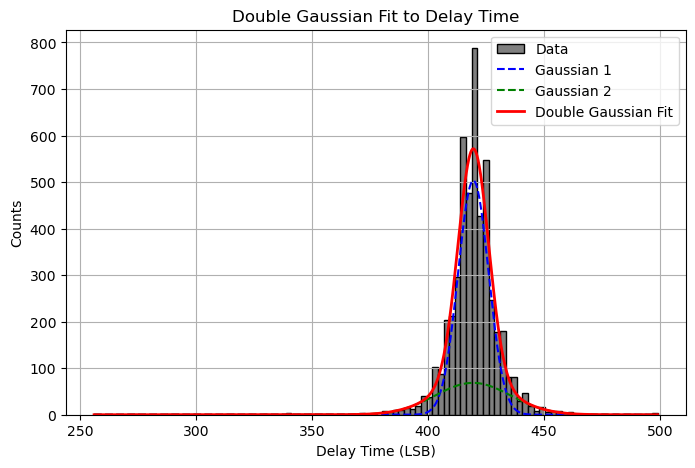

CTR_measured (FWHM): 16.67 LSB
CTR_measured (FWHM): 407.06 ps


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [7]:
# Cell 7: Get CTR

fwhm = Double_Gaussian_Fit(df_filtered['DELAYTIME_LSB'])
print(f"CTR_measured (FWHM): {fwhm:.2f} LSB")

lsb_to_ps = 25000 / 1024  
ctr_measured_ps = fwhm * lsb_to_ps
print(f"CTR_measured (FWHM): {ctr_measured_ps:.2f} ps")

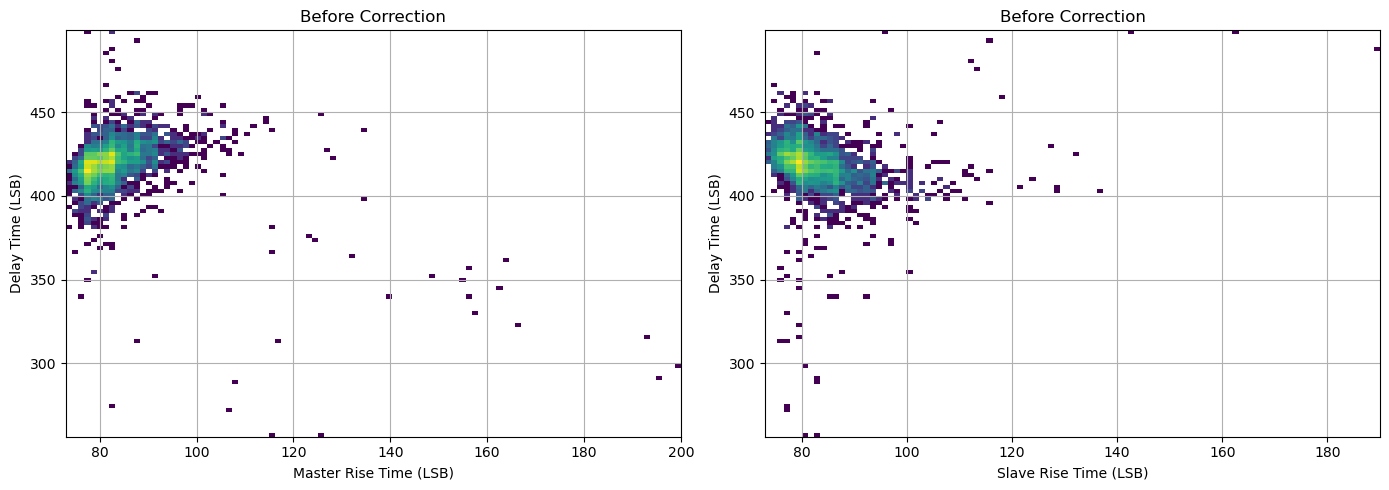

In [ ]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist2d(df_filtered['Master_RISETIME'], df_filtered['DELAYTIME_LSB'], bins=100, cmap='viridis', norm=LogNorm())
axs[0].set_title("Before Correction")
axs[0].set_xlabel("Master Rise Time (LSB)")
axs[0].set_ylabel("Delay Time (LSB)")
axs[0].grid(True)

axs[1].hist2d(df_filtered['Slave_RISETIME'], df_filtered['DELAYTIME_LSB'], bins=100, cmap='viridis', norm=LogNorm())
axs[1].set_title("Before Correction")
axs[1].set_xlabel("Slave Rise Time (LSB)")
axs[1].set_ylabel("Delay Time (LSB)")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [9]:
# Cell 8: Define Crystal_Ball_Correction()

def Max_Correction(df_filtered, risetime_col, delaytime_col, n_chunks=5, bins=100):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm

    df = df_filtered
    df = df.sort_values(by=risetime_col).reset_index(drop=True)
    chunk_size = len(df) // n_chunks

    corrected_delay = np.zeros_like(df[delaytime_col])

    for i in range(n_chunks):
        start = i * chunk_size
        end = (i + 1) * chunk_size if i < n_chunks - 1 else len(df)
        chunk = df.iloc[start:end]

        # Histogram for peak estimation
        hist_vals, bin_edges = np.histogram(chunk[delaytime_col], bins=bins)
        if np.sum(hist_vals) == 0:
            continue  # Skip empty chunks

        peak_bin = np.argmax(hist_vals)
        peak_center = 0.5 * (bin_edges[peak_bin] + bin_edges[peak_bin + 1])

        # Apply correction
        corrected_delay[start:end] = chunk[delaytime_col] - peak_center

    # Save corrected column
    df[delaytime_col] = corrected_delay

    # Plot before/after
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    axs[0].hist2d(df_filtered[risetime_col], df_filtered[delaytime_col], bins=bins, cmap='viridis', norm=LogNorm())
    axs[0].set_title("Before Correction")
    axs[0].set_xlabel("Rise Time (LSB)")
    axs[0].set_ylabel("Delay Time (LSB)")
    axs[0].grid(True)

    axs[1].hist2d(df[risetime_col], df[delaytime_col], bins=bins, cmap='viridis', norm=LogNorm())
    axs[1].set_title("After Correction")
    axs[1].set_xlabel("Rise Time (LSB)")
    axs[1].set_ylabel("Corrected Delay Time (LSB)")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    return df

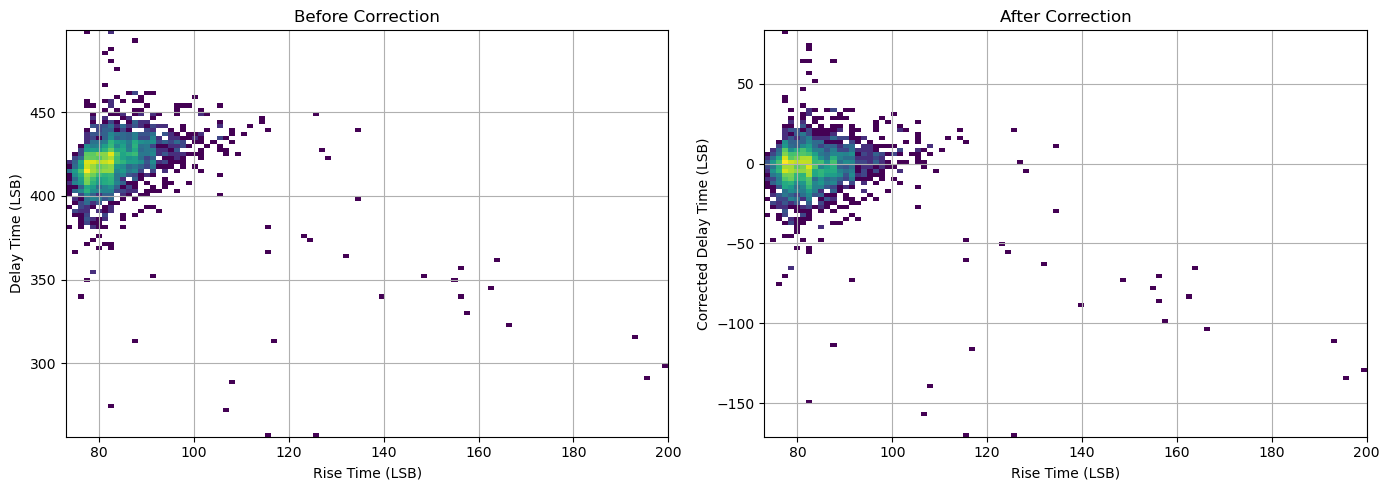

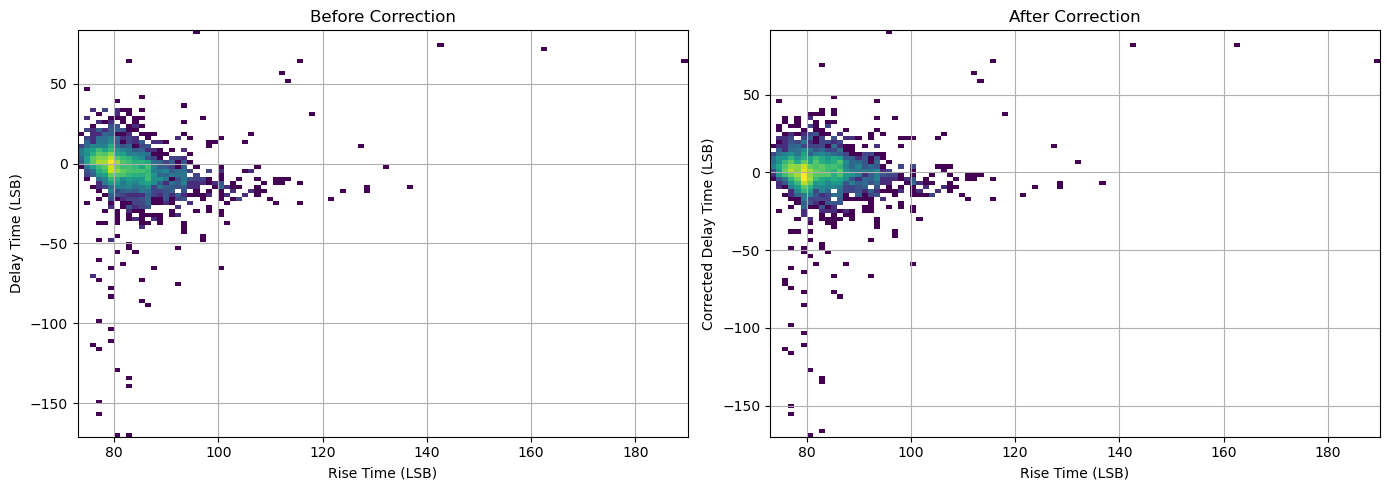

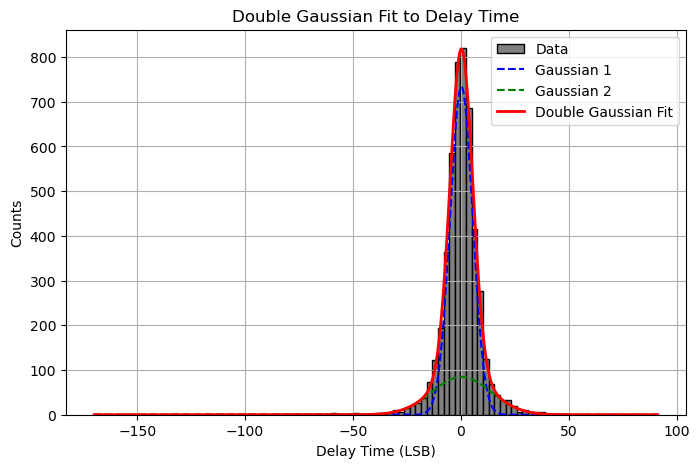

CTR_measured (FWHM): 13.17 LSB
CTR_measured (FWHM): 321.52 ps


In [10]:
# Cell 9: Get Corrected CTR

df_corrected = Max_Correction(df_filtered, 'Master_RISETIME', 'DELAYTIME_LSB', n_chunks=5)
df_corr = Max_Correction(df_corrected, 'Slave_RISETIME', 'DELAYTIME_LSB', n_chunks=5)

# Now we can fit:
fwhm_corr = Double_Gaussian_Fit(df_corr['DELAYTIME_LSB'])
print(f"CTR_measured (FWHM): {fwhm_corr:.2f} LSB")

lsb_to_ps = 25000 / 1024  
ctr_measured_ps = fwhm_corr * lsb_to_ps
print(f"CTR_measured (FWHM): {ctr_measured_ps:.2f} ps")